In [106]:
import pandas as pd
from scipy import stats
import numpy as np
df = pd.read_csv("./dataset/LeagueofLegends.csv")

In [107]:
df.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


In [108]:
#Periksa data NUll
df.isnull().sum()

League               0
Year                 0
Season               0
Type                 0
blueTeamTag         38
bResult              0
rResult              0
redTeamTag          37
gamelength           0
golddiff             0
goldblue             0
bKills               0
bTowers              0
bInhibs              0
bDragons             0
bBarons              0
bHeralds             0
goldred              0
rKills               0
rTowers              0
rInhibs              0
rDragons             0
rBarons              0
rHeralds             0
blueTop             37
blueTopChamp         0
goldblueTop          0
blueJungle          28
blueJungleChamp      0
goldblueJungle       0
blueMiddle          37
blueMiddleChamp      0
goldblueMiddle       0
blueADC             37
blueADCChamp         0
goldblueADC          0
blueSupport         37
blueSupportChamp     0
goldblueSupport      0
blueBans             0
redTop              37
redTopChamp          0
goldredTop           0
redJungle  

In [109]:
#Menampilkan tipe data semua kolom
df.dtypes

League              object
Year                 int64
Season              object
Type                object
blueTeamTag         object
bResult              int64
rResult              int64
redTeamTag          object
gamelength           int64
golddiff            object
goldblue            object
bKills              object
bTowers             object
bInhibs             object
bDragons            object
bBarons             object
bHeralds            object
goldred             object
rKills              object
rTowers             object
rInhibs             object
rDragons            object
rBarons             object
rHeralds            object
blueTop             object
blueTopChamp        object
goldblueTop         object
blueJungle          object
blueJungleChamp     object
goldblueJungle      object
blueMiddle          object
blueMiddleChamp     object
goldblueMiddle      object
blueADC             object
blueADCChamp        object
goldblueADC         object
blueSupport         object
b

In [110]:
#Describe data
df.describe()


,Year,bResult,rResult,gamelength
count,7620.000000,7620.000000,7620.000000,7620.000000
mean,2016.280971,0.544094,0.455906,37.012598
std,0.848200,0.498085,0.498085,7.983238
min,2014.000000,0.000000,0.000000,17.000000
25%,2016.000000,0.000000,0.000000,31.000000
50%,2016.000000,1.000000,0.000000,36.000000
75%,2017.000000,1.000000,1.000000,41.000000
max,2018.000000,1.000000,1.000000,95.000000


In [111]:
#Contoh tampilan data
df.head(1)

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...


In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

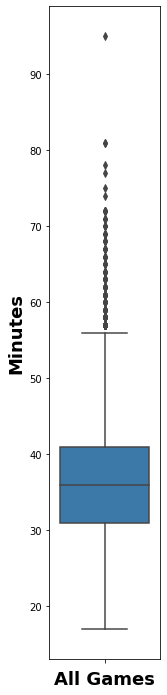

In [113]:
#Boxplot Dengan Outlier
#Digunakan data df['gamelength'] untuk boxplot nya

colors = sns.color_palette('Blues', 20)
plt.figure(figsize=(2,12))
sns.boxplot(y=df['gamelength'], color=colors[14])
plt.xlabel('All Games', fontsize=18, fontweight= 'bold')
plt.ylabel('Minutes', fontsize = 18, fontweight = 'bold')
plt.show()


# Tahap membersihkan Outlier

In [114]:
#Melakukan pembersihan data

df_of_gamelength = df['gamelength'].copy(deep=True)
print(df_of_gamelength)
df_of_gamelength = df_of_gamelength.to_numpy()          #dataframe panda diconvert ke dataframe numpy untuk mengatasi error axis
print('#' * 100)
print(df_of_gamelength)


#Membersihkan outlier
mean = np.mean(df_of_gamelength)    
std_dev = np.std(df_of_gamelength)
dis_from_mean = abs(df_of_gamelength - mean)
max_deviation = 2
not_outlier = dis_from_mean < max_deviation * std_dev
no_outliers = df_of_gamelength[not_outlier]

print(no_outliers)


0       40
1       38
2       40
3       41
4       35
        ..
7615    34
7616    39
7617    24
7618    35
7619    42
Name: gamelength, Length: 7620, dtype: int64
####################################################################################################
[40 38 40 ... 24 35 42]
[40 38 40 ... 24 35 42]


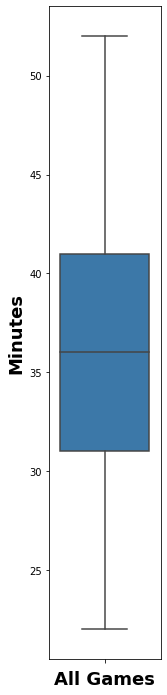

In [115]:
#Boxplot setelah outlier dibersihkan

colors = sns.color_palette('Blues', 20)
plt.figure(figsize=(2,12))
sns.boxplot(y=no_outliers, color=colors[14])
plt.xlabel('All Games', fontsize=18, fontweight= 'bold')
plt.ylabel('Minutes', fontsize = 18, fontweight = 'bold')
plt.show()

In [116]:
# Analisis Boxplot

boxplot_IQR = stats.iqr(no_outliers)
boxplot_Q1 = np.percentile(no_outliers, 25, interpolation='midpoint')
boxplot_Q3 = np.percentile(no_outliers, 75, interpolation='midpoint')
boxtplot_IQR_2  = boxplot_Q3 - boxplot_Q1
boxplot_minimum = boxplot_Q1-(1.5*boxplot_IQR)
boxplot_maximum = boxplot_Q3+(1.5*boxplot_IQR)
boxplot_median = np.median(no_outliers)
boxplot_mean = np.mean(no_outliers)

print("IQR : " , boxplot_IQR)
print("boxplot_Q1 : " , boxplot_Q1)
print("boxplot_Q3 : " , boxplot_Q3)
print("boxtplot_IQR_2 : " , boxtplot_IQR_2)
print("boxplot_minimum : " , boxplot_minimum)
print("boxplot_maximum : " , boxplot_maximum)
print("boxplot_median : " , boxplot_median)
print("boxplot_mean : " , boxplot_mean)



IQR :  10.0
boxplot_Q1 :  31.0
boxplot_Q3 :  41.0
boxtplot_IQR_2 :  10.0
boxplot_minimum :  16.0
boxplot_maximum :  56.0
boxplot_median :  36.0
boxplot_mean :  36.10950612188747


Text(0, 0.5, 'Count of All Games')

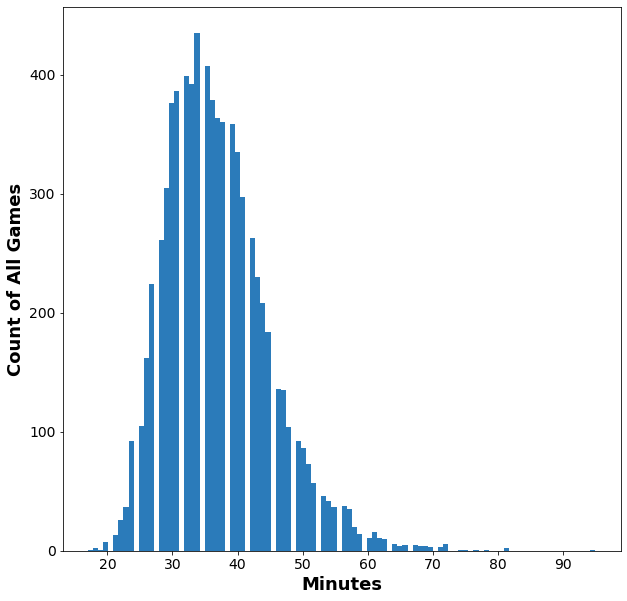

In [117]:
#gamelength versi histogram

plt.figure(figsize=(10,10))
plt.hist(x='gamelength', bins=100, data=df, color=colors[14])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Minutes', fontweight = 'bold', fontsize = 18)
plt.ylabel('Count of All Games', fontsize=18, fontweight='bold')

In [118]:
# Analisis Data Kemenangan pada Sisi Team Merah dan Team Biru

blue_wins = df.bResult.sum()
red_wins = df.rResult.sum()

print(blue_wins)
print(red_wins)


4146
3474


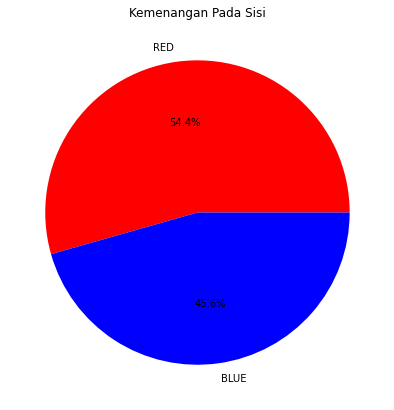

In [119]:
# Pie chart Data

sides = ['RED', 'BLUE']
data = [blue_wins, red_wins]

#create pieplot
fig = plt.figure(figsize=(10,7))

plt.pie(data, labels = sides, colors=['r','b'], autopct='%1.1f%%')
plt.title('Kemenangan Pada Sisi')

plt.show()

In [120]:
# TODO : Ganteng doang jemput pacar depanggang